# BAN6800-Module-4-Business-Analytics-Model
# Shield360 Project - Customer Churn Prediction Model
# Voke H Edafejimue

### IMPORT LIBRARIES

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import joblib
import pickle
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objs as go
from dash.dependencies import Input, Output
import numpy as np

###  Load Dataset

In [159]:
#Load the dataset
df = pd.read_csv("telco_churn_cleaned.csv")
df.shape

(7043, 76)

### Data Review & Cleansing

In [161]:
# Show duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate Columns:\n", duplicate_columns)

# Drop duplicate columns (keep the first occurrence)
df = df.loc[:, ~df.columns.duplicated()]

# Drop non-predictive columns
df = df.drop(['Churn Label', 'Churn Reason', 'Churn Score', 'Customer Status',
    'Churn Category', 'CLTV', 'Total Refunds', 'CustomerID', 'ID'], axis=1, errors='ignore')

# Convert Total Charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

# Encode target variable
df['Churn Value'] = df['Churn Value'].astype(int)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

df.info()
df.head()

Duplicate Columns:
 Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 67 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Customer ID                               7043 non-null   int32  
 1   Country                                   7043 non-null   int32  
 2   State                                     7043 non-null   int32  
 3   City                                      7043 non-null   int32  
 4   Zip Code                                  7043 non-null   int64  
 5   Gender                                    7043 non-null   int64  
 6   Partner                                   7043 non-null   int64  
 7   Dependents                                7043 non-null   int64  
 8   Tenure Months                             7043 non-null   int64  
 9   Phone Service                             7043 non-null   int

,Customer ID,Country,State,City,Zip Code,Gender,Partner,Dependents,Tenure Months,Phone Service,...,Payment Method_Electronic check.1,Payment Method_Mailed check.1,Internet Type_DSL.1,Internet Type_Fiber Optic.1,Internet Type_None.1,Offer_Offer A.1,Offer_Offer B.1,Offer_Offer C.1,Offer_Offer D.1,Offer_Offer E.1
0,2564,0,0,562,90003,1,0,0,2,1,...,False,True,True,False,False,False,False,False,False,False
1,6511,0,0,562,90005,0,0,1,2,1,...,True,False,False,True,False,False,False,False,False,False
2,6551,0,0,562,90006,0,0,1,8,1,...,True,False,False,False,False,False,False,False,False,False
3,5604,0,0,562,90010,0,1,1,28,1,...,True,False,False,True,False,False,False,True,False,False
4,174,0,0,562,90015,1,0,1,49,1,...,False,False,False,True,False,False,False,False,False,False


### Train/Test Split

In [163]:
# Create X (features) and y (target) datasets
X = df.drop(['Customer ID', 'Churn Value'], axis=1, errors='ignore')
y = df['Churn Value']
feature_names = X.columns.tolist()

# using the train/test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42, test_size = 0.2, shuffle = True)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Confirm the splitting is correct:
print("Shape of Training Data : ", "\nfeatures:", X_train.shape, ", target:", y_train.shape)
print("Target Label Distribution in train set : ", "\nChurn:", y_train.sum(), ", Not Churn:", len(y_train) - y_train.sum())
print("Percentage of Churn:", y_train.sum() / len(y_train) * 100)
print()
print("Shape of Test Data : ", "\nfeatures:", X_test.shape, ", target:", y_test.shape)
print("Target Label Distribution in test set : ", "\nChurn:", y_test.sum(), ", Not Churn:", len(y_test) - y_test.sum())
print("Percentage of Churn:", y_test.sum() / len(y_test) * 100)


Shape of Training Data :  
features: (5634, 65) , target: (5634,)
Target Label Distribution in train set :  
Churn: 1495 , Not Churn: 4139
Percentage of Churn: 26.53532126375577

Shape of Test Data :  
features: (1409, 65) , target: (1409,)
Target Label Distribution in test set :  
Churn: 374 , Not Churn: 1035
Percentage of Churn: 26.54364797728886


## Modeling


=== Evaluating Logistic_regression ===
Train F1 Score: 0.9086360419860833
Test F1 Score: 0.9092473316157528
Test Recall: 0.9022824149422615


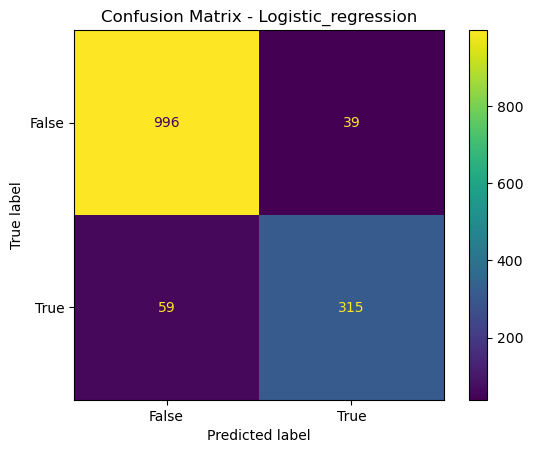


=== Evaluating Decision_tree ===
Train F1 Score: 0.936111822441873
Test F1 Score: 0.9328446328536953
Test Recall: 0.9170335064196957


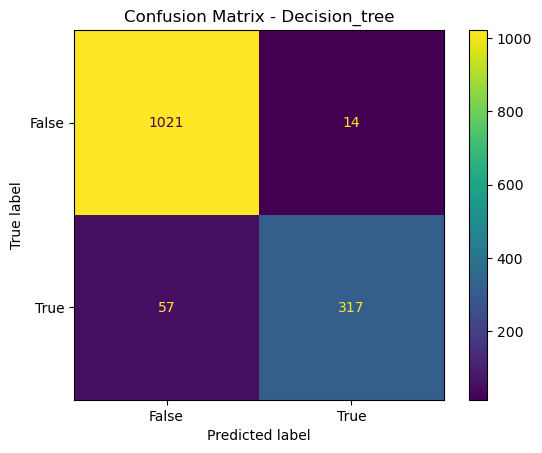


=== Evaluating Random_forest ===
Train F1 Score: 0.9299728329109878
Test F1 Score: 0.9291282171191795
Test Recall: 0.9087537781911184


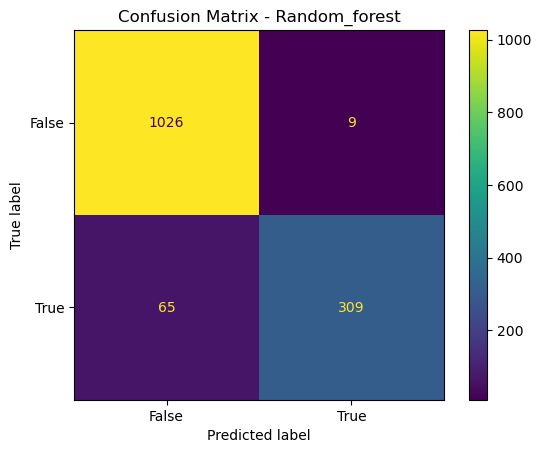


=== Evaluating GBDT ===
Train F1 Score: 0.9864682617464786
Test F1 Score: 0.9354620931654383
Test Recall: 0.923976336252551


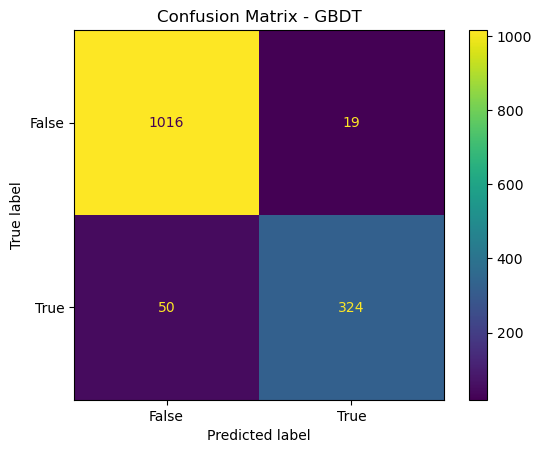


=== Evaluating Neural_Network ===


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
Train F1 Score: 0.9785573384986137
Test F1 Score: 0.9339539244133268
Test Recall: 0.9247177658942365


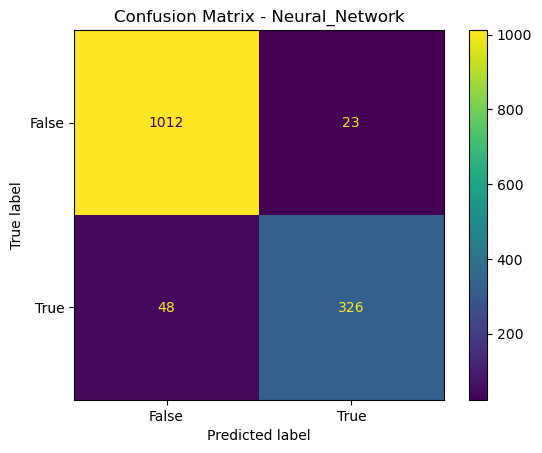

In [165]:
# Define a dictionary of models
list_of_models = {
    'Logistic_regression' : LogisticRegression(random_state=42, max_iter=10000),
    'Decision_tree' : DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random_forest' : RandomForestClassifier(n_estimators=150, max_depth=4, random_state=42),
    'GBDT' : GradientBoostingClassifier(n_estimators=150, max_depth=4, random_state=42),
    'Neural_Network': 'Keras'  # Placeholder
}

# define empty lists to populate scores.
f1_train_scores = [] 
f1_test_scores = [] 
recall_test_scores = []

model_names = list_of_models.keys()

for model_name in model_names:
    print(f"\n=== Evaluating {model_name} ===")

    if model_name == 'Neural_Network':
        # Build and train MLP model using Keras
        nn_model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])

        nn_model.compile(optimizer=Adam(learning_rate=0.001),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

        nn_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32,
                     validation_split=0.2, verbose=0)

        # Predictions
        y_train_pred_nn = (nn_model.predict(X_train_scaled) > 0.5).astype(int)
        y_test_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

        #Cross-validation
        cross_val_score(model, X, y, cv=5, scoring='f1_macro')

        # Evaluation
        f1_train = f1_score(y_train, y_train_pred_nn, average='macro')
        f1_test = f1_score(y_test, y_test_pred_nn, average='macro')
        recall_test_score = recall_score(y_test, y_test_pred_nn, average='macro')

        print(f"Train F1 Score: {f1_train}")
        print(f"Test F1 Score: {f1_test}")
        print(f"Test Recall: {recall_test_score}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred_nn)
        metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
        plt.title(f"Confusion Matrix - {model_name}")
        plt.show()

    else:
        model = list_of_models[model_name]
        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        #Cross-validation
        cross_val_score(model, X, y, cv=5, scoring='f1_macro')

        f1_train = f1_score(y_train, y_train_pred, average='macro')
        f1_test = f1_score(y_test, y_test_pred, average='macro')
        recall_test_score = recall_score(y_test, y_test_pred, average='macro')

        print(f"Train F1 Score: {f1_train}")
        print(f"Test F1 Score: {f1_test}")
        print(f"Test Recall: {recall_test_score}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
        plt.title(f"Confusion Matrix - {model_name}")
        plt.show()

    # Save metrics
    f1_train_scores.append(f1_train)
    f1_test_scores.append(f1_test)
    recall_test_scores.append(recall_test_score)

### Model Performance Evaluation for Selection

In [167]:
# Display the results in tabular form.
results_df = pd.DataFrame({
    'Model': list(model_names),
    'F1 Score (Train)': f1_train_scores,
    'F1 Score (Test)': f1_test_scores,
    'Recall (Test)': recall_test_scores
})

results_df.sort_values(by='F1 Score (Test)', ascending=False) # sorted by F1 Score (Test)

,Model,F1 Score (Train),F1 Score (Test),Recall (Test)
3,GBDT,0.986468,0.935462,0.923976
4,Neural_Network,0.978557,0.933954,0.924718
1,Decision_tree,0.936112,0.932845,0.917034
2,Random_forest,0.929973,0.929128,0.908754
0,Logistic_regression,0.908636,0.909247,0.902282


### Chosen Model Evaluation

[[1016   19]
 [  50  324]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1035
           1       0.94      0.87      0.90       374

    accuracy                           0.95      1409
   macro avg       0.95      0.92      0.94      1409
weighted avg       0.95      0.95      0.95      1409



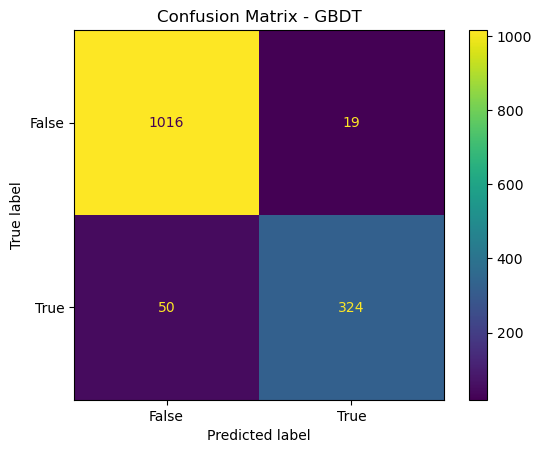

AUC Score: 0.9897414038079


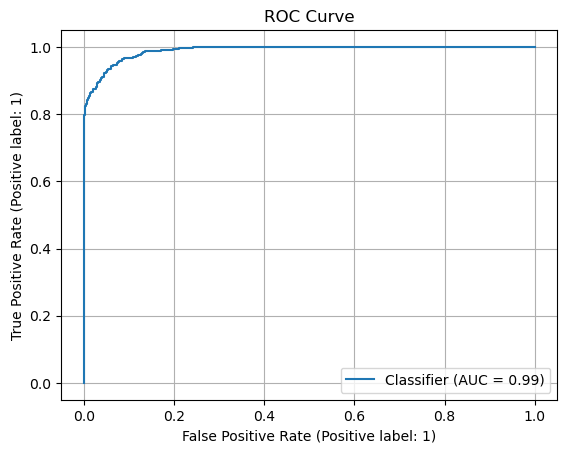

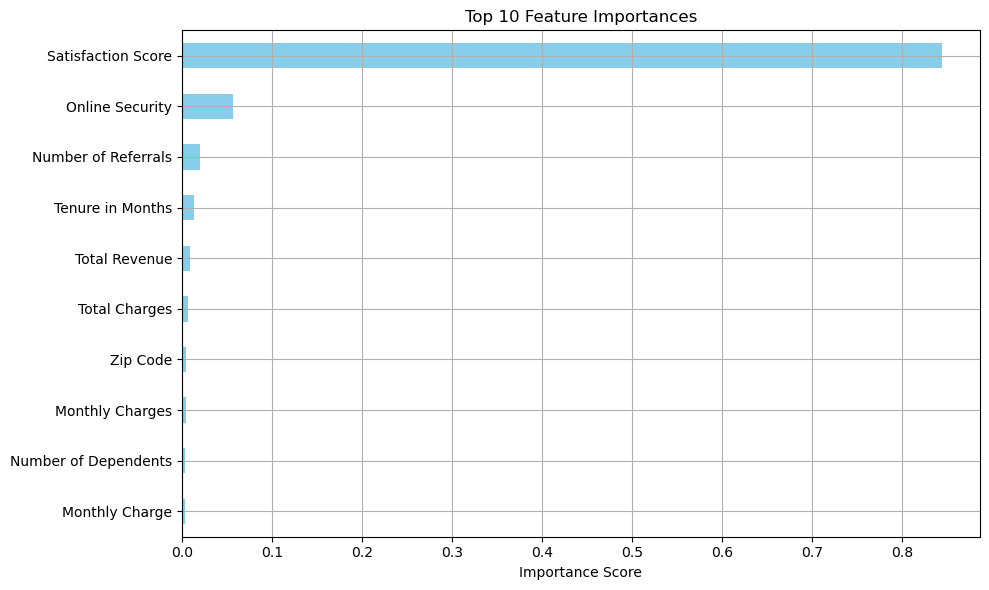

In [169]:
# Select the trained model from the dictionary

final_model_name = 'GBDT'
model = list_of_models[final_model_name]

# Predictions
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

# Classification Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.title(f"Confusion Matrix - {final_model_name}")
plt.show()

# ROC AUC Score
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Get probability for class 1
auc = roc_auc_score(y_test, y_pred_probs)
print("AUC Score:", auc)

# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
plt.title("ROC Curve")
plt.grid(True)
plt.show()

# Make sure you're using a model that has the attribute 'feature_importances_'
if hasattr(model, 'feature_importances_'):
    # Create a Series with feature importances
    importances = pd.Series(model.feature_importances_, index=X.columns)

    # Sort and plot the top 10 features
    top_features = importances.sort_values(ascending=False).head(10)

    # Plot
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh', color='skyblue')
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.title("Top 10 Feature Importances")
    plt.xlabel("Importance Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("The selected model does not support feature importance.")


### Save the Model

In [171]:
# Load cleaned dataset
df = pd.read_csv('telco_churn_cleaned.csv')  # Make sure it's clean and matches the model

# Your trained model
model = GradientBoostingClassifier()

# Train the model (using some data, e.g., X_train, y_train)
model.fit(X_train, y_train)

# Save the entire trained model (not just predictions)
with open('gbdt_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("GBDT model successfully saved")
    
# Save to file using pickle
with open('gbdt_features.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
    print("GBDT Features successfully saved")

GBDT model successfully saved
GBDT Features successfully saved


### Conclusion

#### The GBDT model outperforms the other models on the training and test datasets. The Multilayer Perceptron (MLP), Decision Tree, and Random Forest models performed well too. Though considered the simplest and easiest to understand, the Logistic Regression model had the lowest F1 score.

#### An AUC score of 0.99 suggests that there is a 99% chance that the GBDT model will correctly identify a subscriber with high churn risk. The model is reliable and can be confidently used to carry out subscriber retention strategies.

#### Features like the 'Satisfaction score' prove to be the most important factor in the dataset. Other features also play vital roles in the chosen models.


### References

#### Natassha Selvaraj. February 1, 2024. How to Build a Customer Churn Prediction Model in Python? 365 Data Science. https://365datascience.com/tutorials/python-tutorials/how-to-build-a-customer-churn-prediction-model-in-python/
#### 	Himanshi Singh. November 18, 2024. 10 Techniques to Solve Imbalanced Classes in Machine Learning. Analytics Vidhya. https://www.analyticsvidhya.com/articles/class-imbalance-in-machine-learning

#### Adiaturb. June 6, 2023. Customer Churn Prediction with Python — End-to-End Machine Learning Project. Medium. https://medium.com/@adiaturb/customer-churn-prediction-with-python-end-to-end-machine-learning-project-93ccc6b2218f

#### Luca Petriconi. August 11, 2021. Churn Modeling: A detailed step-by-step Guide in Python. Medium. https://medium.com/@lucapetriconi/churn-modeling-a-detailed-step-by-step-guide-in-python-1e96d51c75233

